In [1]:
import pandas as pd
from read_data import read_data
import numpy as np

def compute_delta_metrics(data):
    """
    Computes additional metrics for the dataset:
    - Delta Position: Leader's position minus Follower's position.
    - Delta Velocity: Leader's velocity minus Follower's velocity.
    - Delta Acceleration: Leader's acceleration minus Follower's acceleration.
    - Time-To-Collision (TTC): Delta Position divided by Delta Velocity.
    """
    data["delta_position"] = data["x_leader"] - data["x_follower"]
    data["delta_velocity"] = data["v_follower"] - data["v_leader"]
    data["delta_acceleration"] = data["a_follower"] - data["a_leader"]
    data["TTC"] = data["delta_position"] / data["delta_velocity"]
    data.loc[data["TTC"] < 0, "TTC"] = np.nan
    data['time_headway'] = data['delta_position'] / data['v_follower']
    data['TTC_min'] = data['TTC']

    # Calculate jerk for the follower vehicle
    data['jerk_follower'] = np.gradient(data['a_follower'], data['time'])
    return data

def aggregate_data_by_case(data):
    """
    Aggregates the dataset by 'case_id' to find the max and min 
    of each delta metric and TTC for each case.
    Renames columns for clarity and adds case_id as a column.
    """
    aggr_data = data.groupby('case_id').agg({'delta_velocity':'mean',
                           'v_follower':'max',
                           'delta_acceleration':'mean',
                           'a_follower':'max',
                           'jerk_follower':'mean',
                           'time_headway':'median',
                           'delta_position':'min',
                           'TTC':'median',
                           'TTC_min':'min'}).reset_index()

    return aggr_data

def adjust_ttc_sign(aggregated_data):
    """
    Ensures TTC (Time-To-Collision) is non-negative by taking the absolute value.
    """
    aggregated_data["TTC"] = aggregated_data["TTC"].abs()
    aggregated_data["TTC_min"] = aggregated_data["TTC_min"].abs()
    return aggregated_data

def convert_df(dataset: str, mode: str):
    """
    Main function that utilizes the above helper functions to preprocess the data.
    Returns a DataFrame grouped by 'case_id' with max and min values of
    delta position, delta velocity, delta acceleration, and TTC (Time-To-Collision).
    """
    data = read_data(dataset, mode)
    data = compute_delta_metrics(data)
    aggregated_data = aggregate_data_by_case(data)
    aggregated_data = adjust_ttc_sign(aggregated_data)
    return aggregated_data



In [2]:
trainHA = convert_df("HA", "train")
trainHA.head(500)

,case_id,delta_velocity,v_follower,delta_acceleration,a_follower,jerk_follower,time_headway,delta_position,TTC,TTC_min
0,0,-0.585128,11.712142,0.047007,2.369844,-0.028677,1.697374,9.428864,61.144338,16.595543
1,1,-0.109332,14.526137,0.039523,0.837482,-0.022997,1.499226,18.421163,80.305906,20.562361
2,2,-0.717295,13.135771,-0.140948,1.012260,0.010870,3.379581,16.096035,7.636726,5.728496
3,3,1.121150,15.083161,0.026782,0.394586,-0.018426,1.937762,22.154348,25.245706,18.166619
4,4,0.587793,14.517350,-0.022323,0.667001,-0.018814,2.044764,14.362037,36.424020,7.093686
...,...,...,...,...,...,...,...,...,...,...
495,495,0.197079,14.385285,-0.088729,0.305779,-0.006375,2.179975,27.189289,59.974457,29.818995
496,496,1.227572,12.163433,-0.068099,0.397671,0.018117,2.446065,6.359919,11.324800,3.282347
497,497,0.317125,14.519390,-0.096140,1.157213,-0.019941,1.829167,17.585190,29.175127,7.392851
498,498,0.278913,14.095021,-0.065379,0.344991,-0.036504,1.402545,15.717958,33.327711,16.101418


In [3]:
selected_features = trainHA
#print selected_features length
print(len(selected_features))





26394


c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

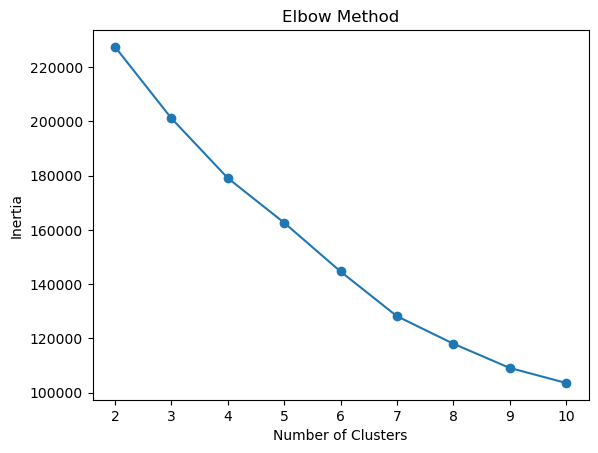

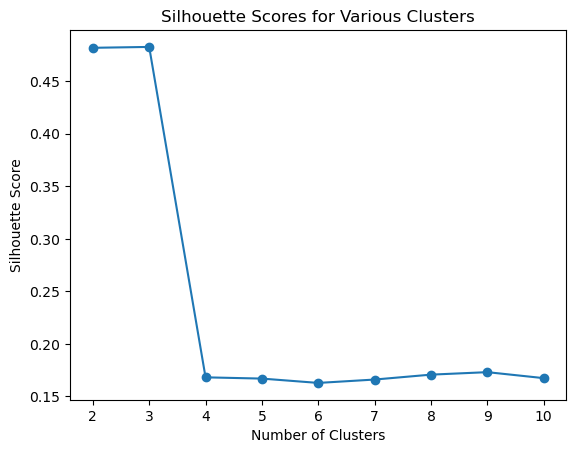

c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

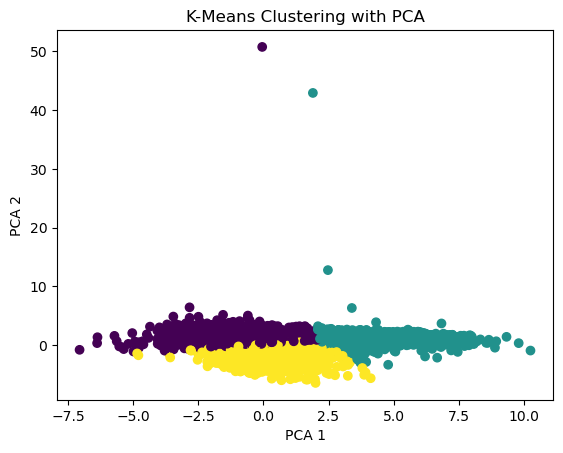

The average silhouette_score is: 0.387634585168151


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def normalize_and_cluster(features, n_clusters=3, apply_pca=False):
    """
    Normalize the given feature dataframe, apply PCA if requested,
    and perform KMeans clustering on the data.
    
    Args:
    - features (pd.DataFrame): The dataframe to normalize and cluster.
    - n_clusters (int): Number of clusters.
    - apply_pca (bool): Apply PCA if True.
    
    Returns:
    - tuple: The normalized data, PCA applied data (if requested), and cluster labels.
    """
    # Normalize data
    scaler = StandardScaler()
    features_numeric = features.select_dtypes(include=np.number).dropna()
    normalized_data = scaler.fit_transform(features_numeric)
    
    # Apply PCA
    pca_data = None
    if apply_pca:
        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(normalized_data)
        data_to_cluster = pca_data
    else:
        data_to_cluster = normalized_data
    
    # Perform KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_to_cluster)
    features_numeric['cluster'] = labels
    
    return normalized_data, pca_data, labels, features_numeric

def plot_results(features, labels, pca_data=None):
    """
    Plot the results of the KMeans clustering, using PCA data if provided.
    
    Args:
    - features (pd.DataFrame): The feature dataframe.
    - labels (np.array): The cluster labels.
    - pca_data (np.array): The PCA applied data (if PCA was applied).
    """
    if pca_data is not None:
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.title('K-Means Clustering with PCA')
    else:
        fig = plt.figure(figsize=(15, 7))
        ax1 = fig.add_subplot(121, projection='3d')
        scatter1 = ax1.scatter(features['TTC'], 
                               features['time_headway'], 
                               features['delta_velocity'], 
                               c=labels, 
                               cmap='viridis', 
                               s=50)
        ax1.set_xlabel('TTC')
        ax1.set_ylabel('Time Headway')
        ax1.set_zlabel('Delta Velocity')
        ax1.set_title('K-Means Clustering Results')
        legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
        ax1.add_artist(legend1)
    
    plt.show()

def find_optimal_clusters(data, max_clusters=10):
    """
    Find the optimal number of clusters using the elbow method and silhouette score.
    
    Args:
    - data (np.array): The data to find the optimal clusters for.
    - max_clusters (int): The maximum number of clusters to test.
    
    Returns:
    - int: The optimal number of clusters based on the elbow method and silhouette score.
    """
    inertia_list = []
    silhouette_scores = []
    for n_clusters in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)
        inertia_list.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    # Elbow Method Plot
    plt.plot(range(2, max_clusters+1), inertia_list, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()
    
    # Silhouette Score Plot
    plt.plot(range(2, max_clusters+1), silhouette_scores, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Various Clusters')
    plt.show()
    
    # Assuming the elbow is at the cluster number with the highest silhouette score
    optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2
    
    return optimal_clusters

# Usage
selected_features = trainHA  # assuming this is a predefined dataframe

# Finding optimal number of clusters
normalized_data, _, _, _ = normalize_and_cluster(selected_features, apply_pca=True)
optimal_clusters = find_optimal_clusters(normalized_data)

# Clustering and plotting
_, pca_data, labels, clustered_data = normalize_and_cluster(selected_features, n_clusters=optimal_clusters, apply_pca=True)
plot_results(selected_features, labels, pca_data)

# Computing the average silhouette score
silhouette_avg = silhouette_score(pca_data, labels)
print("The average silhouette_score is:", silhouette_avg)


In [5]:
def train_df(dataset: str, clustered_data: pd.DataFrame, mode: str):
    """
    Returns a DataFrame with delta position, delta velocity, v_follower and cluster.
    """
    data = read_data(dataset, mode)
    data = compute_delta_metrics(data)
    print(data.head())
    print(clustered_data.head())
    
    # Merge the data with clustered_data on 'case_id' to get the 'cluster' column
    data = pd.merge(data, clustered_data[['case_id', 'cluster']], on='case_id', how='left')
    
    print(data.head())
    return data


train_data = train_df("HA", clustered_data, "train")


   case_id  time  x_leader  x_follower  v_leader  v_follower  a_leader  \
0        0   0.0  0.000000   -9.428864  2.629775    0.784441  1.315692   
1        0   0.1  0.263154   -9.341833  2.665530    0.810204  1.348330   
2        0   0.2  0.535099   -9.265412  2.776808    0.828016  1.407345   
3        0   0.3  0.828920   -9.107064  2.966034    0.889182  1.482459   
4        0   0.4  1.147062   -8.933068  3.168645    0.979196  1.552755   

   a_follower  l_leader  l_follower  delta_position  delta_velocity  \
0    0.831906      4.85         4.0        9.428864       -1.845334   
1    0.848821      4.85         4.0        9.604988       -1.855325   
2    0.875646      4.85         4.0        9.800511       -1.948792   
3    0.910850      4.85         4.0        9.935984       -2.076852   
4    0.954763      4.85         4.0       10.080130       -2.189449   

   delta_acceleration  TTC  time_headway  TTC_min  jerk_follower  
0           -0.483786  NaN     12.019848      NaN       0.169

In [15]:
train_data1 = train_data.copy()
train_data1

,case_id,time,x_leader,x_follower,v_leader,v_follower,a_leader,a_follower,l_leader,l_follower,delta_position,delta_velocity,delta_acceleration,TTC,time_headway,TTC_min,jerk_follower,cluster
0,0,0.0,0.000000,-9.428864,2.629775e+00,0.784441,1.315692,0.831906,4.85,4.000000,9.428864,-1.845334,-0.483786,NaN,12.019848,NaN,0.169150,0.0
1,0,0.1,0.263154,-9.341833,2.665530e+00,0.810204,1.348330,0.848821,4.85,4.000000,9.604988,-1.855325,-0.499510,NaN,11.855018,NaN,0.218699,0.0
2,0,0.2,0.535099,-9.265412,2.776808e+00,0.828016,1.407345,0.875646,4.85,4.000000,9.800511,-1.948792,-0.531699,NaN,11.836133,NaN,0.310144,0.0
3,0,0.3,0.828920,-9.107064,2.966034e+00,0.889182,1.482459,0.910850,4.85,4.000000,9.935984,-2.076852,-0.571609,NaN,11.174300,NaN,0.395585,0.0
4,0,0.4,1.147062,-8.933068,3.168645e+00,0.979196,1.552755,0.954763,4.85,4.000000,10.080130,-2.189449,-0.597993,NaN,10.294287,NaN,0.478596,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124113,26393,21.5,23.460644,17.509131,-1.224044e-14,0.005863,-0.000065,0.019480,4.85,4.261504,5.951513,0.005863,0.019546,1015.089539,1015.089539,1015.089539,0.011031,0.0
7124114,26393,21.6,23.460644,17.562307,-6.071740e-15,0.020706,-0.000069,0.017621,4.85,4.261504,5.898337,0.020706,0.017690,284.854786,284.854786,284.854786,-0.054494,0.0
7124115,26393,21.7,23.460644,17.588280,-1.017347e-14,0.019477,-0.000056,0.008581,4.85,4.261504,5.872365,0.019477,0.008637,301.498696,301.498696,301.498696,-0.117347,0.0
7124116,26393,21.8,23.460644,17.607007,-5.046575e-15,0.015674,-0.000035,-0.005849,4.85,4.261504,5.853637,0.015674,-0.005814,373.451266,373.451266,373.451266,-0.142894,0.0


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import math

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions


clustered_dataframes = {}
for cluster_number in clustered_data['cluster'].unique():
    clustered_dataframes[cluster_number] = clustered_data[clustered_data['cluster'] == cluster_number].drop(columns=['cluster', 'case_id'])

# def preprocess_data(df, n_steps_in, n_steps_out, test_size=0.2):
#     scaler = StandardScaler()
#     data_normalized = scaler.fit_transform(df)
#     X, y = create_sequences(data_normalized, n_steps_in, n_steps_out)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
#     return (
#         torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32),
#         torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32),
#         scaler
#     )
def preprocess_data(df, n_steps_in=30, n_steps_out=10, test_size=0.2):
    # Only retain the required columns
    df = df[["delta_position", "delta_velocity", "v_follower"]]

    # Normalize the data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(df)

    # Create sequences
    X, y = create_sequences(data_normalized, n_steps_in, n_steps_out)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Convert to torch tensor
    return (
        torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32),
        torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32),
        scaler
    )

# def create_sequences(data, n_steps_in, n_steps_out):
#     X, y = [], []
#     for i in range(len(data)):
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         if out_end_ix > len(data):
#             break
#         seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, :]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)

def create_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:i+n_steps_in])
        y.append(data[i+n_steps_in:i+n_steps_in+n_steps_out]) 
    return np.array(X), np.array(y)

def train_model(model, X_train_tensor, y_train_tensor, epochs, optimizer, loss_function):
    for epoch in tqdm(range(epochs), desc='Training Epochs'):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_tensor)
        loss = loss_function(y_pred, y_train_tensor[:, 0, :])
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            tqdm.write(f'Epoch: {epoch} Loss: {loss.item():.4f}')

def evaluate_model(model, X_test_tensor, y_test_tensor, scaler):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor)
        y_pred = y_pred.cpu().numpy()
        y_pred_original = scaler.inverse_transform(y_pred)
        y_test_original = scaler.inverse_transform(y_test_tensor.cpu().numpy()[:, 0, :])
        mse = mean_squared_error(y_test_original, y_pred_original)
        rmse = math.sqrt(mse)
        mae = mean_absolute_error(y_test_original, y_pred_original)
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')
    return mse, rmse, mae

models_scalers = {}
n_steps_in, n_steps_out = 3, 1
for cluster, cluster_df in clustered_dataframes.items():
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, scaler = preprocess_data(cluster_df, n_steps_in, n_steps_out)
    model = LSTMModel(input_size=X_train_tensor.shape[2], hidden_layer_size=50, output_size=y_train_tensor.shape[2])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_function = nn.MSELoss()
    train_model(model, X_train_tensor, y_train_tensor, epochs=1000, optimizer=optimizer, loss_function=loss_function)
    mse, rmse, mae = evaluate_model(model, X_test_tensor, y_test_tensor, scaler)
    models_scalers[cluster] = {'model': model, 'scaler': scaler, 'metrics': (mse, rmse, mae)}

# Save the model and scaler if needed
torch.save(models_scalers, 'models_scalers.pth')


c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inst

Training Epochs:   2%|▏         | 18/1000 [00:00<00:10, 89.94it/s]

Epoch: 0 Loss: 1.0155
Epoch: 10 Loss: 1.0047


Training Epochs:   4%|▍         | 38/1000 [00:00<00:10, 93.88it/s]

Epoch: 20 Loss: 0.9988
Epoch: 30 Loss: 0.9956


Training Epochs:   6%|▌         | 58/1000 [00:00<00:09, 95.12it/s]

Epoch: 40 Loss: 0.9931
Epoch: 50 Loss: 0.9915


Training Epochs:   8%|▊         | 78/1000 [00:00<00:09, 95.82it/s]

Epoch: 60 Loss: 0.9902
Epoch: 70 Loss: 0.9891


Training Epochs:  10%|▉         | 98/1000 [00:01<00:09, 96.91it/s]

Epoch: 80 Loss: 0.9882
Epoch: 90 Loss: 0.9872


Training Epochs:  12%|█▏        | 118/1000 [00:01<00:09, 97.46it/s]

Epoch: 100 Loss: 0.9862
Epoch: 110 Loss: 0.9852


Training Epochs:  13%|█▎        | 128/1000 [00:01<00:08, 97.16it/s]

Epoch: 120 Loss: 0.9842
Epoch: 130 Loss: 0.9831


Training Epochs:  15%|█▍        | 149/1000 [00:01<00:08, 98.58it/s]

Epoch: 140 Loss: 0.9819
Epoch: 150 Loss: 0.9807


Training Epochs:  18%|█▊        | 180/1000 [00:01<00:08, 98.76it/s]

Epoch: 160 Loss: 0.9794
Epoch: 170 Loss: 0.9782


Training Epochs:  20%|██        | 200/1000 [00:02<00:08, 98.74it/s]

Epoch: 180 Loss: 0.9769
Epoch: 190 Loss: 0.9757


Training Epochs:  21%|██        | 210/1000 [00:02<00:07, 98.94it/s]

Epoch: 200 Loss: 0.9745
Epoch: 210 Loss: 0.9733


Training Epochs:  23%|██▎       | 231/1000 [00:02<00:07, 99.45it/s]

Epoch: 220 Loss: 0.9720
Epoch: 230 Loss: 0.9707


Training Epochs:  25%|██▌       | 253/1000 [00:02<00:07, 100.39it/s]

Epoch: 240 Loss: 0.9693
Epoch: 250 Loss: 0.9678


Training Epochs:  28%|██▊       | 275/1000 [00:02<00:07, 100.36it/s]

Epoch: 260 Loss: 0.9661
Epoch: 270 Loss: 0.9642


Training Epochs:  30%|██▉       | 297/1000 [00:03<00:06, 100.43it/s]

Epoch: 280 Loss: 0.9621
Epoch: 290 Loss: 0.9598


Training Epochs:  32%|███▏      | 319/1000 [00:03<00:06, 99.81it/s] 

Epoch: 300 Loss: 0.9572
Epoch: 310 Loss: 0.9545


Training Epochs:  33%|███▎      | 329/1000 [00:03<00:06, 99.68it/s]

Epoch: 320 Loss: 0.9514
Epoch: 330 Loss: 0.9480


Training Epochs:  36%|███▌      | 360/1000 [00:03<00:06, 99.00it/s]

Epoch: 340 Loss: 0.9444
Epoch: 350 Loss: 0.9406


Training Epochs:  37%|███▋      | 370/1000 [00:03<00:06, 99.28it/s]

Epoch: 360 Loss: 0.9364
Epoch: 370 Loss: 0.9320


Training Epochs:  39%|███▉      | 390/1000 [00:03<00:06, 99.54it/s]

Epoch: 380 Loss: 0.9271
Epoch: 390 Loss: 0.9219


Training Epochs:  41%|████      | 412/1000 [00:04<00:05, 100.31it/s]

Epoch: 400 Loss: 0.9162
Epoch: 410 Loss: 0.9103


Training Epochs:  43%|████▎     | 434/1000 [00:04<00:05, 100.24it/s]

Epoch: 420 Loss: 0.9042
Epoch: 430 Loss: 0.8979


Training Epochs:  46%|████▌     | 456/1000 [00:04<00:05, 99.79it/s] 

Epoch: 440 Loss: 0.8914
Epoch: 450 Loss: 0.8847


Training Epochs:  48%|████▊     | 478/1000 [00:04<00:05, 100.14it/s]

Epoch: 460 Loss: 0.8778
Epoch: 470 Loss: 0.8706


Training Epochs:  50%|█████     | 500/1000 [00:05<00:05, 99.95it/s] 

Epoch: 480 Loss: 0.8634
Epoch: 490 Loss: 0.8562


Training Epochs:  51%|█████     | 510/1000 [00:05<00:04, 99.78it/s]

Epoch: 500 Loss: 0.8488
Epoch: 510 Loss: 0.8412


Training Epochs:  53%|█████▎    | 531/1000 [00:05<00:04, 99.71it/s]

Epoch: 520 Loss: 0.8333
Epoch: 530 Loss: 0.8253


Training Epochs:  55%|█████▌    | 553/1000 [00:05<00:04, 100.57it/s]

Epoch: 540 Loss: 0.8170
Epoch: 550 Loss: 0.8085


Training Epochs:  57%|█████▊    | 575/1000 [00:05<00:04, 99.98it/s] 

Epoch: 560 Loss: 0.8000
Epoch: 570 Loss: 0.7914


Training Epochs:  60%|█████▉    | 595/1000 [00:06<00:04, 96.53it/s]

Epoch: 580 Loss: 0.7828
Epoch: 590 Loss: 0.7742


Training Epochs:  62%|██████▏   | 616/1000 [00:06<00:03, 98.34it/s]

Epoch: 600 Loss: 0.7656
Epoch: 610 Loss: 0.7569


Training Epochs:  64%|██████▎   | 636/1000 [00:06<00:03, 98.70it/s]

Epoch: 620 Loss: 0.7484
Epoch: 630 Loss: 0.7400


Training Epochs:  66%|██████▌   | 657/1000 [00:06<00:03, 99.63it/s]

Epoch: 640 Loss: 0.7318
Epoch: 650 Loss: 0.7238


Training Epochs:  68%|██████▊   | 678/1000 [00:06<00:03, 99.70it/s]

Epoch: 660 Loss: 0.7161
Epoch: 670 Loss: 0.7086


Training Epochs:  70%|██████▉   | 698/1000 [00:07<00:03, 98.46it/s]

Epoch: 680 Loss: 0.7013
Epoch: 690 Loss: 0.6942


Training Epochs:  72%|███████▏  | 718/1000 [00:07<00:02, 98.91it/s]

Epoch: 700 Loss: 0.6872
Epoch: 710 Loss: 0.6804


Training Epochs:  74%|███████▍  | 739/1000 [00:07<00:02, 99.39it/s]

Epoch: 720 Loss: 0.6737
Epoch: 730 Loss: 0.6672


Training Epochs:  76%|███████▌  | 760/1000 [00:07<00:02, 99.83it/s]

Epoch: 740 Loss: 0.6607
Epoch: 750 Loss: 0.6544


Training Epochs:  77%|███████▋  | 771/1000 [00:07<00:02, 99.99it/s]

Epoch: 760 Loss: 0.6484
Epoch: 770 Loss: 0.6424


Training Epochs:  79%|███████▉  | 793/1000 [00:08<00:02, 100.36it/s]

Epoch: 780 Loss: 0.6366
Epoch: 790 Loss: 0.6309


Training Epochs:  82%|████████▏ | 815/1000 [00:08<00:01, 100.82it/s]

Epoch: 800 Loss: 0.6253
Epoch: 810 Loss: 0.6197


Training Epochs:  84%|████████▎ | 837/1000 [00:08<00:01, 99.89it/s] 

Epoch: 820 Loss: 0.6143
Epoch: 830 Loss: 0.6090


Training Epochs:  86%|████████▌ | 857/1000 [00:08<00:01, 99.84it/s]

Epoch: 840 Loss: 0.6037
Epoch: 850 Loss: 0.5986


Training Epochs:  88%|████████▊ | 879/1000 [00:08<00:01, 100.49it/s]

Epoch: 860 Loss: 0.5936
Epoch: 870 Loss: 0.5887


Training Epochs:  89%|████████▉ | 890/1000 [00:09<00:01, 100.27it/s]

Epoch: 880 Loss: 0.5840
Epoch: 890 Loss: 0.5793


Training Epochs:  91%|█████████ | 911/1000 [00:09<00:00, 99.87it/s] 

Epoch: 900 Loss: 0.5747
Epoch: 910 Loss: 0.5703


Training Epochs:  93%|█████████▎| 931/1000 [00:09<00:00, 98.56it/s]

Epoch: 920 Loss: 0.5658
Epoch: 930 Loss: 0.5615


Training Epochs:  95%|█████████▌| 951/1000 [00:09<00:00, 97.30it/s]

Epoch: 940 Loss: 0.5572
Epoch: 950 Loss: 0.5530


Training Epochs:  97%|█████████▋| 971/1000 [00:09<00:00, 97.63it/s]

Epoch: 960 Loss: 0.5488
Epoch: 970 Loss: 0.5448


Training Epochs:  99%|█████████▉| 991/1000 [00:10<00:00, 98.09it/s]

Epoch: 980 Loss: 0.5407
Epoch: 990 Loss: 0.5368


Training Epochs: 100%|██████████| 1000/1000 [00:10<00:00, 98.81it/s]
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be remove

MSE: 6.05, RMSE: 2.46, MAE: 1.68


Training Epochs:   1%|          | 8/1000 [00:00<00:13, 71.80it/s]

Epoch: 0 Loss: 1.0050
Epoch: 10 Loss: 0.9872


Training Epochs:   3%|▎         | 32/1000 [00:00<00:12, 74.93it/s]

Epoch: 20 Loss: 0.9743
Epoch: 30 Loss: 0.9638


Training Epochs:   6%|▌         | 56/1000 [00:00<00:12, 76.98it/s]

Epoch: 40 Loss: 0.9532
Epoch: 50 Loss: 0.9428


Training Epochs:   7%|▋         | 72/1000 [00:00<00:12, 76.62it/s]

Epoch: 60 Loss: 0.9344
Epoch: 70 Loss: 0.9282


Training Epochs:   9%|▉         | 88/1000 [00:01<00:11, 76.84it/s]

Epoch: 80 Loss: 0.9236
Epoch: 90 Loss: 0.9202


Training Epochs:  11%|█         | 112/1000 [00:01<00:11, 78.21it/s]

Epoch: 100 Loss: 0.9175
Epoch: 110 Loss: 0.9151


Training Epochs:  14%|█▎        | 136/1000 [00:01<00:11, 78.20it/s]

Epoch: 120 Loss: 0.9127
Epoch: 130 Loss: 0.9103


Training Epochs:  15%|█▌        | 152/1000 [00:01<00:10, 78.29it/s]

Epoch: 140 Loss: 0.9079
Epoch: 150 Loss: 0.9055


Training Epochs:  18%|█▊        | 176/1000 [00:02<00:10, 78.56it/s]

Epoch: 160 Loss: 0.9032
Epoch: 170 Loss: 0.9010


Training Epochs:  19%|█▉        | 192/1000 [00:02<00:10, 78.30it/s]

Epoch: 180 Loss: 0.8990
Epoch: 190 Loss: 0.8971


Training Epochs:  21%|██        | 208/1000 [00:02<00:10, 77.88it/s]

Epoch: 200 Loss: 0.8954
Epoch: 210 Loss: 0.8939


Training Epochs:  23%|██▎       | 232/1000 [00:03<00:10, 74.99it/s]

Epoch: 220 Loss: 0.8924
Epoch: 230 Loss: 0.8910


Training Epochs:  25%|██▍       | 248/1000 [00:03<00:10, 74.83it/s]

Epoch: 240 Loss: 0.8896
Epoch: 250 Loss: 0.8883


Training Epochs:  27%|██▋       | 272/1000 [00:03<00:09, 74.64it/s]

Epoch: 260 Loss: 0.8868
Epoch: 270 Loss: 0.8854


Training Epochs:  29%|██▉       | 288/1000 [00:03<00:09, 76.44it/s]

Epoch: 280 Loss: 0.8839
Epoch: 290 Loss: 0.8823


Training Epochs:  31%|███       | 312/1000 [00:04<00:09, 76.14it/s]

Epoch: 300 Loss: 0.8807
Epoch: 310 Loss: 0.8790


Training Epochs:  34%|███▎      | 336/1000 [00:04<00:08, 77.20it/s]

Epoch: 320 Loss: 0.8772
Epoch: 330 Loss: 0.8753


Training Epochs:  35%|███▌      | 352/1000 [00:04<00:08, 77.67it/s]

Epoch: 340 Loss: 0.8734
Epoch: 350 Loss: 0.8713


Training Epochs:  38%|███▊      | 376/1000 [00:04<00:07, 78.08it/s]

Epoch: 360 Loss: 0.8691
Epoch: 370 Loss: 0.8669


Training Epochs:  39%|███▉      | 392/1000 [00:05<00:07, 77.39it/s]

Epoch: 380 Loss: 0.8645
Epoch: 390 Loss: 0.8621


Training Epochs:  42%|████▏     | 416/1000 [00:05<00:07, 77.00it/s]

Epoch: 400 Loss: 0.8595
Epoch: 410 Loss: 0.8568


Training Epochs:  43%|████▎     | 432/1000 [00:05<00:07, 77.25it/s]

Epoch: 420 Loss: 0.8540
Epoch: 430 Loss: 0.8511


Training Epochs:  45%|████▍     | 448/1000 [00:05<00:07, 76.70it/s]

Epoch: 440 Loss: 0.8480
Epoch: 450 Loss: 0.8448


Training Epochs:  47%|████▋     | 473/1000 [00:06<00:06, 78.26it/s]

Epoch: 460 Loss: 0.8413
Epoch: 470 Loss: 0.8377


Training Epochs:  50%|████▉     | 497/1000 [00:06<00:06, 77.48it/s]

Epoch: 480 Loss: 0.8339
Epoch: 490 Loss: 0.8299


Training Epochs:  51%|█████▏    | 513/1000 [00:06<00:06, 77.71it/s]

Epoch: 500 Loss: 0.8258
Epoch: 510 Loss: 0.8217


Training Epochs:  54%|█████▎    | 537/1000 [00:06<00:05, 77.26it/s]

Epoch: 520 Loss: 0.8176
Epoch: 530 Loss: 0.8134


Training Epochs:  55%|█████▌    | 553/1000 [00:07<00:05, 77.64it/s]

Epoch: 540 Loss: 0.8093
Epoch: 550 Loss: 0.8050


Training Epochs:  57%|█████▋    | 569/1000 [00:07<00:05, 78.10it/s]

Epoch: 560 Loss: 0.8006
Epoch: 570 Loss: 0.7961


Training Epochs:  59%|█████▉    | 593/1000 [00:07<00:05, 77.45it/s]

Epoch: 580 Loss: 0.7916
Epoch: 590 Loss: 0.7870


Training Epochs:  62%|██████▏   | 617/1000 [00:07<00:04, 77.86it/s]

Epoch: 600 Loss: 0.7823
Epoch: 610 Loss: 0.7776


Training Epochs:  63%|██████▎   | 633/1000 [00:08<00:04, 77.85it/s]

Epoch: 620 Loss: 0.7729
Epoch: 630 Loss: 0.7684


Training Epochs:  65%|██████▌   | 650/1000 [00:08<00:04, 78.62it/s]

Epoch: 640 Loss: 0.7638
Epoch: 650 Loss: 0.7592


Training Epochs:  67%|██████▋   | 674/1000 [00:08<00:04, 77.55it/s]

Epoch: 660 Loss: 0.7546
Epoch: 670 Loss: 0.7499


Training Epochs:  69%|██████▉   | 690/1000 [00:08<00:04, 76.86it/s]

Epoch: 680 Loss: 0.7453
Epoch: 690 Loss: 0.7408


Training Epochs:  71%|███████▏  | 714/1000 [00:09<00:03, 77.69it/s]

Epoch: 700 Loss: 0.7363
Epoch: 710 Loss: 0.7318


Training Epochs:  73%|███████▎  | 730/1000 [00:09<00:03, 77.72it/s]

Epoch: 720 Loss: 0.7274
Epoch: 730 Loss: 0.7229


Training Epochs:  75%|███████▌  | 754/1000 [00:09<00:03, 77.48it/s]

Epoch: 740 Loss: 0.7185
Epoch: 750 Loss: 0.7141


Training Epochs:  77%|███████▋  | 770/1000 [00:09<00:02, 77.23it/s]

Epoch: 760 Loss: 0.7099
Epoch: 770 Loss: 0.7057


Training Epochs:  79%|███████▉  | 794/1000 [00:10<00:02, 74.63it/s]

Epoch: 780 Loss: 0.7016
Epoch: 790 Loss: 0.6975


Training Epochs:  81%|████████  | 810/1000 [00:10<00:02, 75.07it/s]

Epoch: 800 Loss: 0.6934
Epoch: 810 Loss: 0.6894


Training Epochs:  83%|████████▎ | 834/1000 [00:10<00:02, 76.46it/s]

Epoch: 820 Loss: 0.6853
Epoch: 830 Loss: 0.6814


Training Epochs:  86%|████████▌ | 858/1000 [00:11<00:01, 77.60it/s]

Epoch: 840 Loss: 0.6774
Epoch: 850 Loss: 0.6736


Training Epochs:  87%|████████▋ | 874/1000 [00:11<00:01, 76.83it/s]

Epoch: 860 Loss: 0.6697
Epoch: 870 Loss: 0.6659


Training Epochs:  89%|████████▉ | 890/1000 [00:11<00:01, 76.92it/s]

Epoch: 880 Loss: 0.6622
Epoch: 890 Loss: 0.6585


Training Epochs:  92%|█████████▏| 915/1000 [00:11<00:01, 77.09it/s]

Epoch: 900 Loss: 0.6549
Epoch: 910 Loss: 0.6514


Training Epochs:  93%|█████████▎| 931/1000 [00:12<00:00, 77.11it/s]

Epoch: 920 Loss: 0.6479
Epoch: 930 Loss: 0.6444


Training Epochs:  96%|█████████▌| 955/1000 [00:12<00:00, 76.23it/s]

Epoch: 940 Loss: 0.6410
Epoch: 950 Loss: 0.6376


Training Epochs:  97%|█████████▋| 971/1000 [00:12<00:00, 76.85it/s]

Epoch: 960 Loss: 0.6342
Epoch: 970 Loss: 0.6310


Training Epochs:  99%|█████████▊| 987/1000 [00:12<00:00, 77.49it/s]

Epoch: 980 Loss: 0.6277
Epoch: 990 Loss: 0.6246


Training Epochs: 100%|██████████| 1000/1000 [00:12<00:00, 77.04it/s]
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\miniconda3\envs\project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be remove

MSE: 21.90, RMSE: 4.68, MAE: 2.28


Training Epochs:   3%|▎         | 34/1000 [00:00<00:02, 334.45it/s]

Epoch: 0 Loss: 0.9758
Epoch: 10 Loss: 0.9685
Epoch: 20 Loss: 0.9668
Epoch: 30 Loss: 0.9658
Epoch: 40 Loss: 0.9648
Epoch: 50 Loss: 0.9638


Training Epochs:  10%|█         | 104/1000 [00:00<00:02, 339.05it/s]

Epoch: 60 Loss: 0.9624
Epoch: 70 Loss: 0.9606
Epoch: 80 Loss: 0.9583
Epoch: 90 Loss: 0.9554
Epoch: 100 Loss: 0.9516
Epoch: 110 Loss: 0.9470
Epoch: 120 Loss: 0.9420


Training Epochs:  17%|█▋        | 174/1000 [00:00<00:02, 339.85it/s]

Epoch: 130 Loss: 0.9368
Epoch: 140 Loss: 0.9310
Epoch: 150 Loss: 0.9244
Epoch: 160 Loss: 0.9168
Epoch: 170 Loss: 0.9078
Epoch: 180 Loss: 0.8975
Epoch: 190 Loss: 0.8857


Training Epochs:  24%|██▍       | 244/1000 [00:00<00:02, 337.37it/s]

Epoch: 200 Loss: 0.8721
Epoch: 210 Loss: 0.8566
Epoch: 220 Loss: 0.8390
Epoch: 230 Loss: 0.8189
Epoch: 240 Loss: 0.7961
Epoch: 250 Loss: 0.7706
Epoch: 260 Loss: 0.7433


Training Epochs:  31%|███       | 312/1000 [00:00<00:02, 332.32it/s]

Epoch: 270 Loss: 0.7150
Epoch: 280 Loss: 0.6863
Epoch: 290 Loss: 0.6577
Epoch: 300 Loss: 0.6290
Epoch: 310 Loss: 0.6002
Epoch: 320 Loss: 0.5713


Training Epochs:  38%|███▊      | 381/1000 [00:01<00:01, 336.36it/s]

Epoch: 330 Loss: 0.5423
Epoch: 340 Loss: 0.5134
Epoch: 350 Loss: 0.4846
Epoch: 360 Loss: 0.4563
Epoch: 370 Loss: 0.4290
Epoch: 380 Loss: 0.4029
Epoch: 390 Loss: 0.3779


Training Epochs:  45%|████▍     | 449/1000 [00:01<00:01, 335.20it/s]

Epoch: 400 Loss: 0.3541
Epoch: 410 Loss: 0.3312
Epoch: 420 Loss: 0.3095
Epoch: 430 Loss: 0.2890
Epoch: 440 Loss: 0.2697
Epoch: 450 Loss: 0.2518


Training Epochs:  52%|█████▏    | 518/1000 [00:01<00:01, 338.55it/s]

Epoch: 460 Loss: 0.2352
Epoch: 470 Loss: 0.2200
Epoch: 480 Loss: 0.2059
Epoch: 490 Loss: 0.1928
Epoch: 500 Loss: 0.1805
Epoch: 510 Loss: 0.1689
Epoch: 520 Loss: 0.1581


Training Epochs:  59%|█████▊    | 587/1000 [00:01<00:01, 337.95it/s]

Epoch: 530 Loss: 0.1479
Epoch: 540 Loss: 0.1384
Epoch: 550 Loss: 0.1295
Epoch: 560 Loss: 0.1211
Epoch: 570 Loss: 0.1133
Epoch: 580 Loss: 0.1059
Epoch: 590 Loss: 0.0990


Training Epochs:  66%|██████▌   | 655/1000 [00:01<00:01, 335.18it/s]

Epoch: 600 Loss: 0.0924
Epoch: 610 Loss: 0.0863
Epoch: 620 Loss: 0.0806
Epoch: 630 Loss: 0.0752
Epoch: 640 Loss: 0.0701
Epoch: 650 Loss: 0.0654


Training Epochs:  72%|███████▏  | 723/1000 [00:02<00:00, 333.73it/s]

Epoch: 660 Loss: 0.0610
Epoch: 670 Loss: 0.0569
Epoch: 680 Loss: 0.0530
Epoch: 690 Loss: 0.0494
Epoch: 700 Loss: 0.0460
Epoch: 710 Loss: 0.0429
Epoch: 720 Loss: 0.0399


Training Epochs:  76%|███████▌  | 757/1000 [00:02<00:00, 332.00it/s]

Epoch: 730 Loss: 0.0372
Epoch: 740 Loss: 0.0347
Epoch: 750 Loss: 0.0324
Epoch: 760 Loss: 0.0302
Epoch: 770 Loss: 0.0281
Epoch: 780 Loss: 0.0262


Training Epochs:  82%|████████▎ | 825/1000 [00:02<00:00, 321.02it/s]

Epoch: 790 Loss: 0.0244
Epoch: 800 Loss: 0.0228
Epoch: 810 Loss: 0.0212
Epoch: 820 Loss: 0.0198
Epoch: 830 Loss: 0.0184
Epoch: 840 Loss: 0.0171


Training Epochs:  89%|████████▉ | 893/1000 [00:02<00:00, 328.39it/s]

Epoch: 850 Loss: 0.0160
Epoch: 860 Loss: 0.0149
Epoch: 870 Loss: 0.0139
Epoch: 880 Loss: 0.0129
Epoch: 890 Loss: 0.0120
Epoch: 900 Loss: 0.0112


Training Epochs:  96%|█████████▌| 959/1000 [00:02<00:00, 326.92it/s]

Epoch: 910 Loss: 0.0104
Epoch: 920 Loss: 0.0097
Epoch: 930 Loss: 0.0090
Epoch: 940 Loss: 0.0084
Epoch: 950 Loss: 0.0078
Epoch: 960 Loss: 0.0073
Epoch: 970 Loss: 0.0068


Training Epochs: 100%|██████████| 1000/1000 [00:03<00:00, 332.68it/s]

Epoch: 980 Loss: 0.0063
Epoch: 990 Loss: 0.0059
MSE: 31.58, RMSE: 5.62, MAE: 3.32


In [25]:
# Evaluation dataset is used here to predict the next time step
eval_df = convert_df("HA", "val")


In [26]:
# this is the initial input for the model, the minimum sequence length is 3 so at least 3 rows are needed
eval_df = eval_df.head(3)
eval_df = eval_df.drop(columns=['case_id'])

eval_df


,delta_velocity,v_follower,delta_acceleration,a_follower,jerk_follower,time_headway,delta_position,TTC,TTC_min
0,-0.112306,13.972906,-0.040953,0.913186,0.013031,2.296439,22.095424,124.803687,11.794680
1,1.577983,12.061164,-0.035401,0.162992,0.013574,3.225179,8.866747,18.864220,3.197740
2,-0.274519,12.536280,-0.004253,3.739273,-0.047253,1.156909,9.121510,85.516191,7.427292


In [27]:
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def preprocess_new_data(new_data, scaler, n_steps_in):
    data_scaled = scaler.transform(new_data)
    X_new = []
    for i in range(len(data_scaled) - n_steps_in + 1):
        X_new.append(data_scaled[i:i + n_steps_in, :])
    return np.array(X_new)

def predict_delta_acceleration(eval_df, models_scalers, cluster_number=1, n_steps_in=3, delta_acceleration_index=2):
    """
    Predicts the delta acceleration of a car using an LSTM model trained on car-following data.

    Parameters:
    eval_df (pandas.DataFrame): The input data to predict on.
    models_scalers (dict): A dictionary containing the trained models and scalers for each cluster.
    cluster_number (int): The cluster number to use for prediction.
    n_steps_in (int): The number of time steps to use as input for the LSTM model.
    delta_acceleration_index (int): The index of the delta acceleration column in the output.

    Returns:
    float: The predicted delta acceleration.
    """
    

    # Load the scaler for the cluster
    scaler = models_scalers[cluster_number]['scaler']

    # Prepare the input data for prediction
    X_new_prepared = preprocess_new_data(eval_df.values, scaler, n_steps_in)
    X_new_tensor = torch.tensor(X_new_prepared, dtype=torch.float32)

    # Load the model for the cluster
    model = models_scalers[cluster_number]['model']

    # Predict using the model
    model.eval()
    with torch.no_grad():
        y_new_pred_tensor = model(X_new_tensor)
        y_new_pred = y_new_pred_tensor.numpy()

    # Inverse transform the predictions to the original scale
    y_new_pred_original = scaler.inverse_transform(y_new_pred)

    # Extract the denormalized delta_acceleration values
    delta_acceleration_pred_original = y_new_pred_original[:, delta_acceleration_index]

    # Return the predicted delta acceleration
    return delta_acceleration_pred_original

# Load the model from the saved models_cales.pth file
models_scalers = torch.load('models_scalers.pth')

# Predict the delta acceleration for the eval_df dataframe
cluster_number = 1
delta_acceleration_pred = predict_delta_acceleration(eval_df, models_scalers, cluster_number)
delta_acceleration_pred

c:\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but StandardScaler is expecting 3 features as input.